#                   CAPSTONE PROJECT - 3 - HEART DISEASE PREDICTION

## Heart Disease is number one cause of deaths across the world. It is a group of conditions that affects the heart and blood vessels.
## Despite its global impact, it is often preventable through early diagnosis and healthy lifestyle changes.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## LOADING DATA

In [5]:
df=pd.read_csv('values.csv')
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


### df has only features in it. The labels are loaded seperately and then merged into a single dataframe.

In [7]:
df1=pd.read_csv('labels.csv')
df1

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [8]:
# We are merging both features and labels into a single dataframe.
data=df.merge(df1,on='patient_id')
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


## BASIC CHECKS

In [10]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [11]:
data.shape

(180, 15)

### There are 180 rows and 15 columns in our dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

### We have integers, float and mixed datatypes in our data.
### Most of the columns have numbers.

In [15]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

## STATISTICAL MEASURE OF DATA

In [17]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


### There are no null values in our data.
### The target column is 'heart_disease_present'

## EXPLORATORY DATA ANALYSIS

In [20]:
# To check our target column is fairly distributed or not.
data.heart_disease_present.value_counts().head()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

### Here, 100 people does not have heart disease and 80 people has heart disease. There are not much difference between the values.
### So, it is safe to say that our target column is fairly distributed.

## UNIVARIATE ANALYSIS

## Numerical Columns:

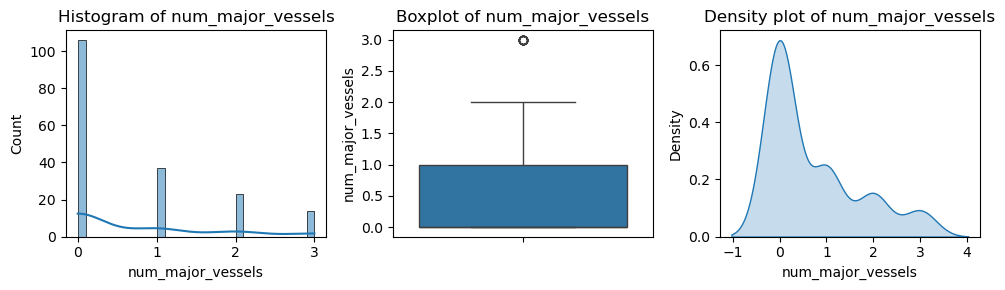

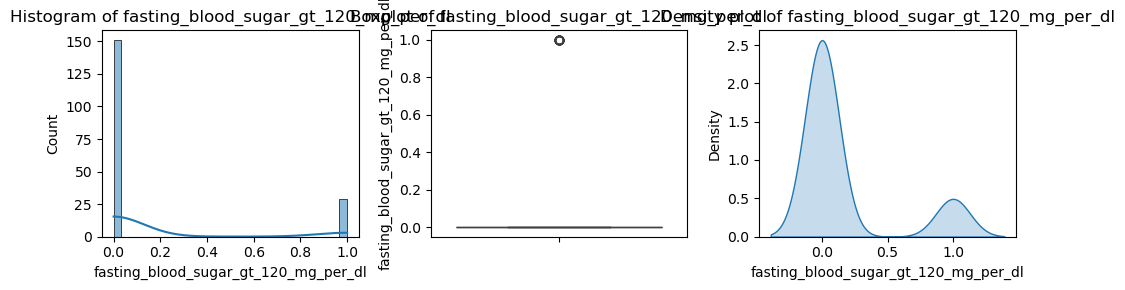

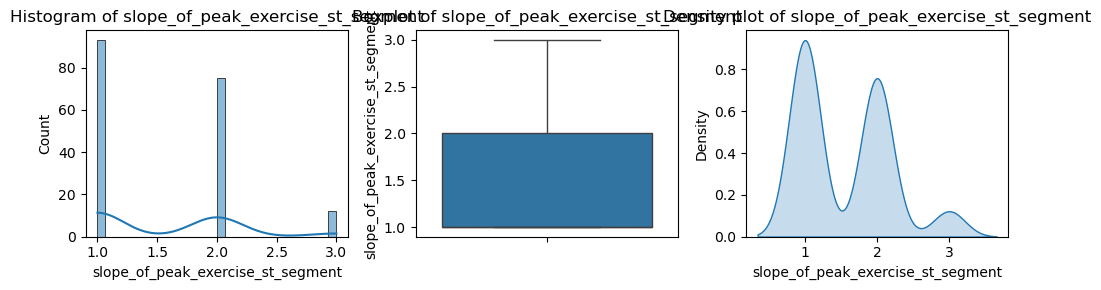

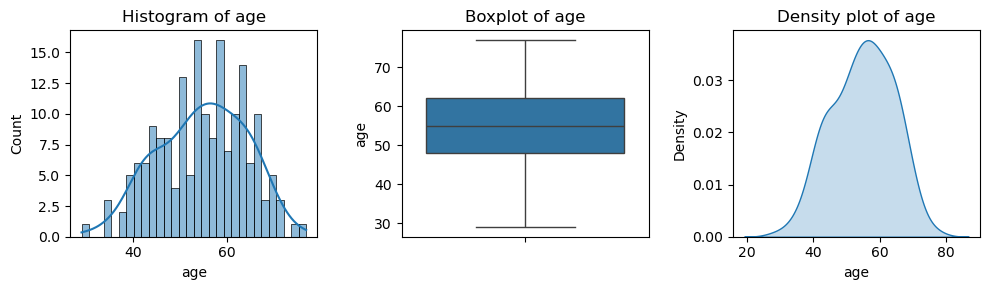

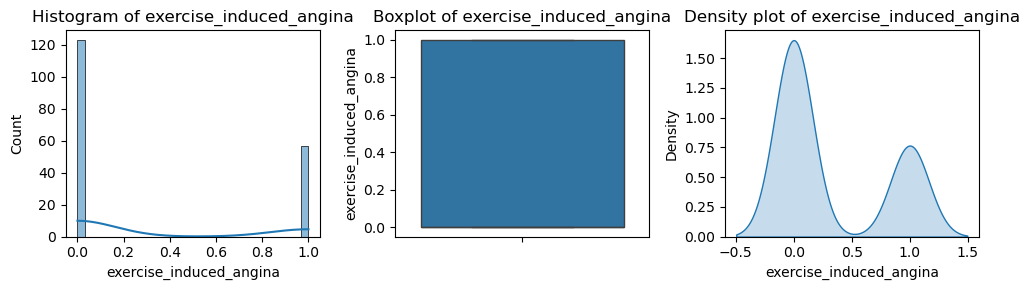

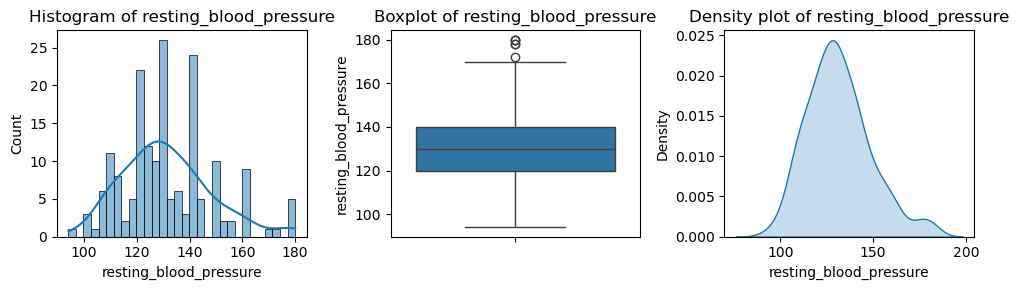

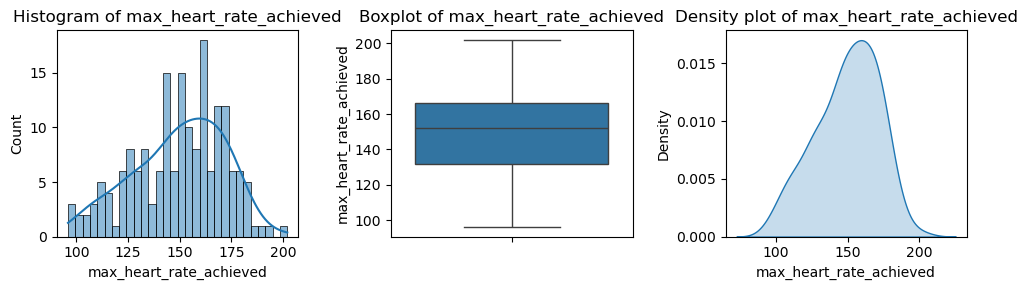

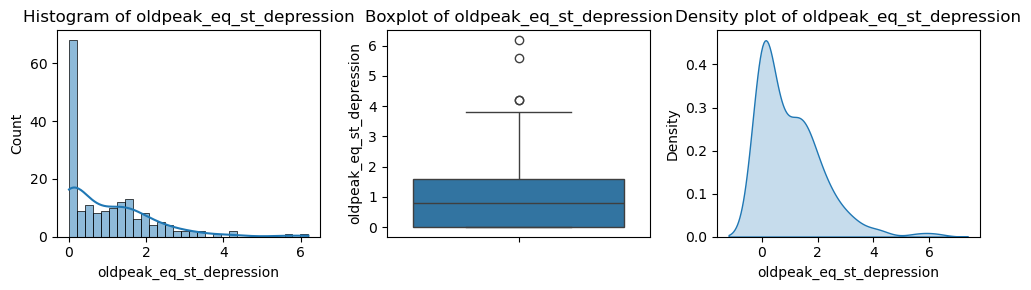

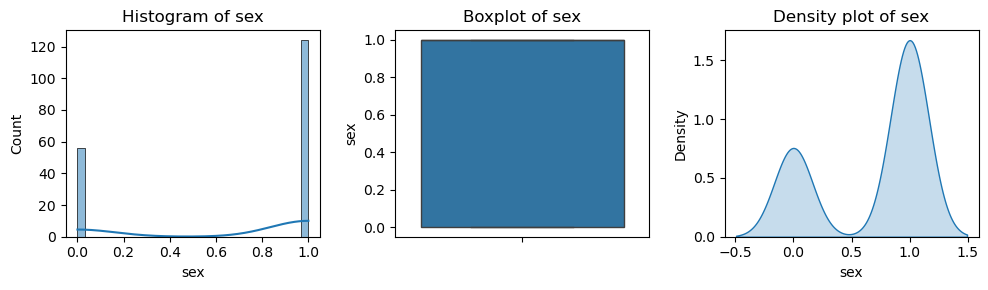

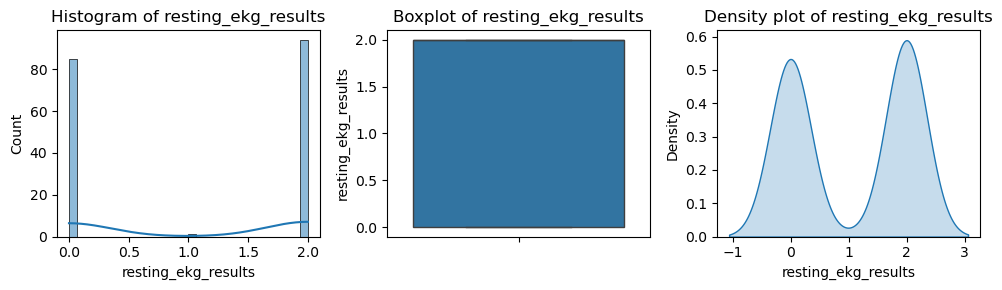

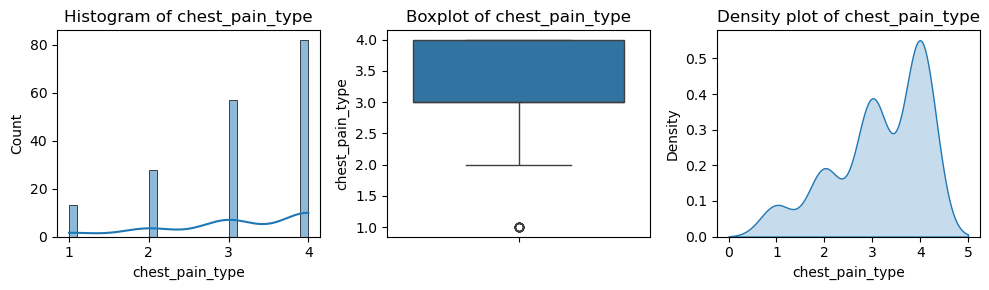

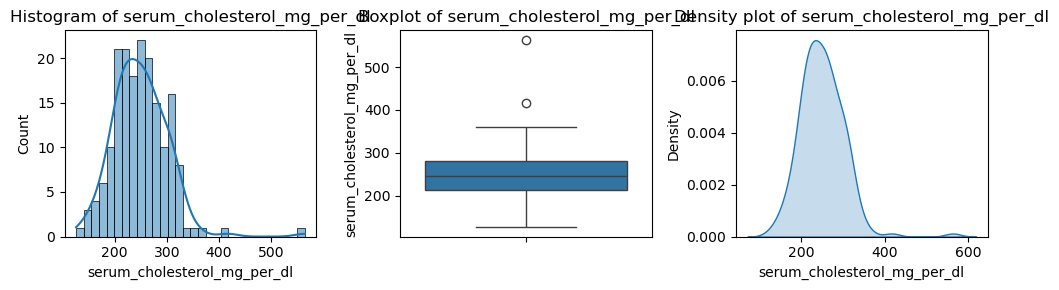

In [24]:
numerical_cols = df.select_dtypes(include=['number']).columns # Select all the numerical columns
exclude_cols = {'heart_disease_present'} # Replace with actual column names

numerical_cols = list(set(numerical_cols) - exclude_cols)
for col in numerical_cols:
    plt.figure(figsize=(10,3))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    # Boxplot 
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

    # KDE plot 
    plt.subplot(1, 3, 3)
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Density plot of {col}')

    plt.tight_layout()
    plt.show()

## INSIGHTS OF UNIVARIATE ANALYSIS

### Number of Major Vessels:
#### The graph is left skewed. There are very few outliers. The value ranges from -1 to 4

### Serum Cholesterol Vessels:
#### The graph is left skewed. Most of the people has the cholesterol level between 100 and 400. There are a few outliers.

### Resting EKG Results:
#### The distribution shows two peaks: One of the individual with normal ECG (indicated by 0) and another for those prone to heart disease (indicated by 1). There are very few outliers present.

### Max Heart Rate Achieved:
#### The graph is right skewed. The heart rate is between 72 and 225. There are no outliers.

### Exercise Induced Angina:
#### The distribution has two peaks. One for the individuals who do not experience the pain in their chest while they exercise (indicated by 0). Another for people who are experiencing chest pain while exercising (indicated by 1)

### Sex:
#### The number of males are higher than the number of females in our data.

### Fasting Blood Sugar:
#### The distribution shows one major peak and a smaller one, indicating that the majority of the individuals have normal blood sugar levels (indicated by 0), while a smaller group has elevated levels.

### Chest Pain Type:
#### The graph is left skewed. The distribution has multiple peaks. The plot shows that the chest pain 4 is most common among patients, where as the chest pain type 1 is less common.

### Oldpeak EQ ST depression:
#### The distribution is right skewed, showing that most indivduals have low ST depression values around(0 - 1), with fewer patients experiencing higher level of ST depression during exercise.

### Age: 
#### The graph is normally distributed. The dataset consists of patients ranging in age from 30 to 80 years. Within this range, individuals between 45 and 70 years old appear to be more commonly affected by heart disease.

### Peak Exercise ST Segment:
#### The distribution has three peaks, with the majority of the patients having slope peak exercise segment value of 1 (considered as normal) where as for value 2 indicates a higher risk of heart disease

### Resting Blood Pressure:
#### The graph is normally distributed. Most of the patients have a resting blood pressure between 70 and 180 with the peak around 130. There are a few outliers.

## BIVARIATE ANALYSIS

## Numerical Columns:

### 1. Excercise Vs Heart Disease

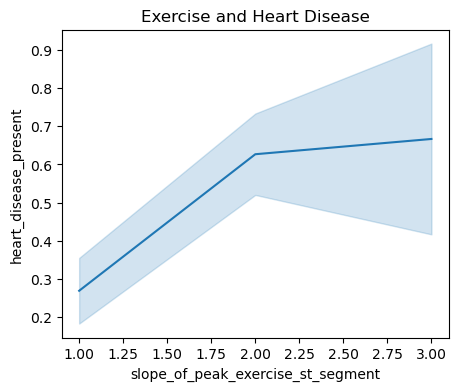

In [30]:
plt.figure(figsize=(5, 4))
sns.lineplot(x=data['slope_of_peak_exercise_st_segment'],y=data['heart_disease_present'])
plt.title("Exercise and Heart Disease")
plt.show()

#### People who are physically active are less prone to Heart Disease

### 2. Thallium stress test Vs Heart Disease

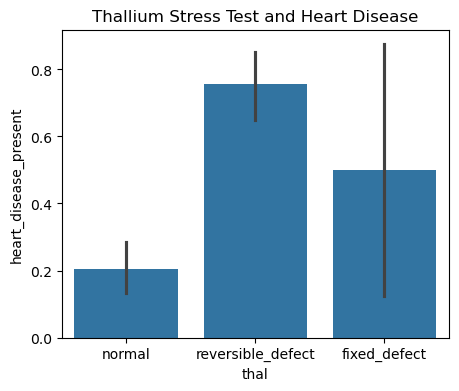

In [33]:
plt.figure(figsize=(5, 4))
sns.barplot(x=data['thal'],y=data['heart_disease_present'])
plt.title("Thallium Stress Test and Heart Disease")
plt.show()

#### Patients with reversible defects on thallium stress test are most likely to have heart disease

### 3. Blood Pressure Vs Heart Disease

### 3(i) Blood Pressure Vs Sex

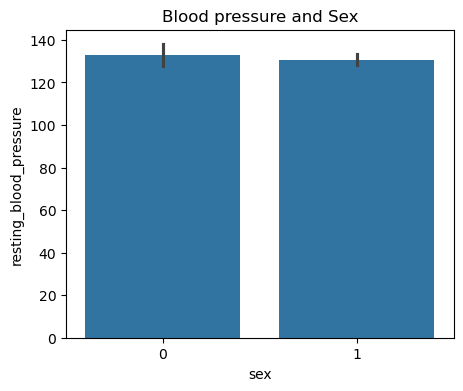

In [37]:
plt.figure(figsize=(5, 4))
sns.barplot(x=data['sex'],y=data['resting_blood_pressure'])
plt.title("Blood pressure and Sex")
plt.show()

### 3(ii) Blood Pressure Vs Age

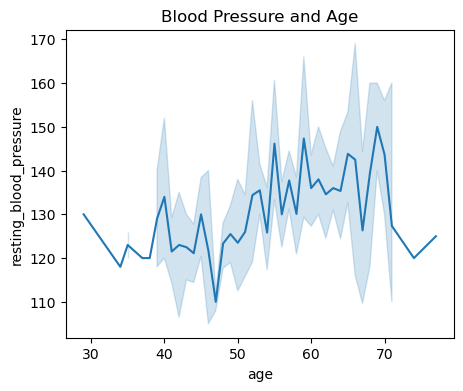

In [39]:
plt.figure(figsize=(5, 4))
sns.lineplot(x=data['age'],y=data['resting_blood_pressure'])
plt.title("Blood Pressure and Age")
plt.show()

### 3(iii) Blood Pressure Vs Heart Disease

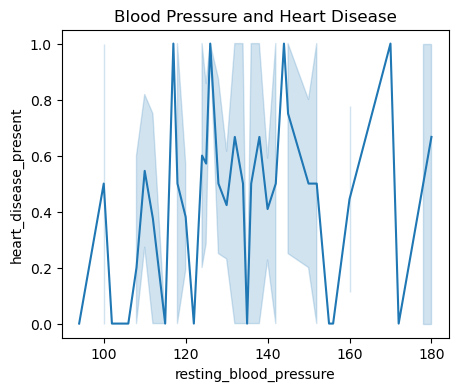

In [41]:
plt.figure(figsize=(5, 4))
sns.lineplot(x=data['resting_blood_pressure'],y=data['heart_disease_present'])
plt.title("Blood Pressure and Heart Disease")
plt.show()

#### Females are having slightly higher blood pressure compared to males.
#### People with high blood pressure falls within the age between 34 and 73 years.
#### People with high blood pressure are more likely to develop heart disease.

### 4. Chest Pain Type Vs Heart Disease

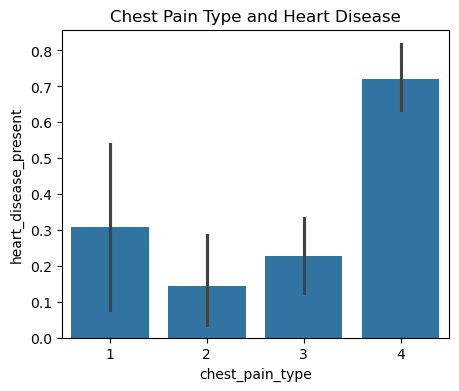

In [44]:
plt.figure(figsize=(5, 4))
sns.barplot(x=data['chest_pain_type'],y=data['heart_disease_present'])
plt.title("Chest Pain Type and Heart Disease")
plt.show()

#### People experiencing type 4 chest pain are confirmed to have heart disease

### 5. Major vessels Vs Heart Disease

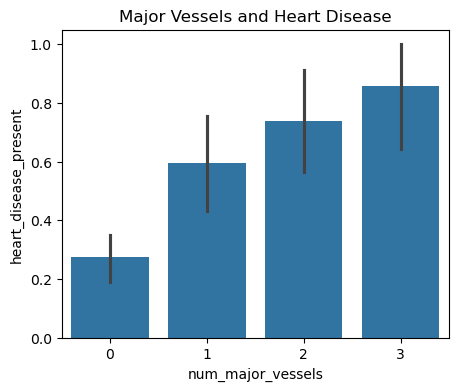

In [47]:
plt.figure(figsize=(5, 4))
sns.barplot(x=data['num_major_vessels'],y=data['heart_disease_present'])
plt.title("Major Vessels and Heart Disease")
plt.show()

#### A shorter bar at 0 shows that fewer people have 0 visible vessels
#### The bar at 3 shows that more number of people's blood vessels appear clear.


### 6. Blood Sugar Vs Heart Disease

### 6(i) Blood Sugar Vs Sex

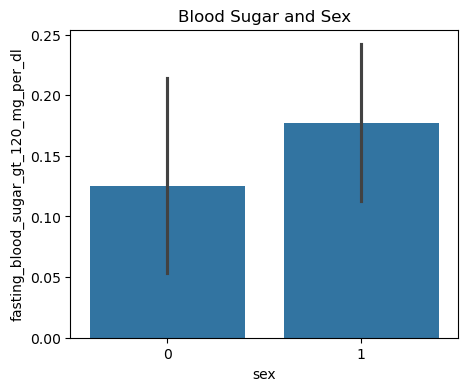

In [51]:
plt.figure(figsize=(5, 4))
sns.barplot(x=data['sex'],y=data['fasting_blood_sugar_gt_120_mg_per_dl'])
plt.title("Blood Sugar and Sex")
plt.show()

### 6(ii) Blood Sugar Vs Age

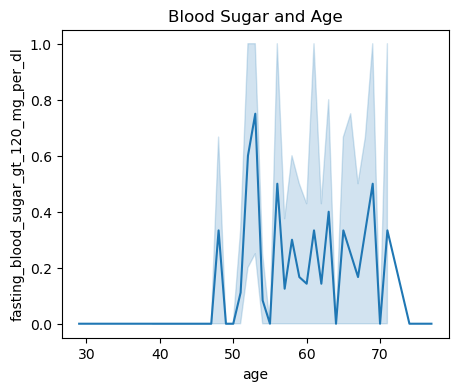

In [53]:
plt.figure(figsize=(5, 4))
sns.lineplot(x=data['age'],y=data['fasting_blood_sugar_gt_120_mg_per_dl'])
plt.title("Blood Sugar and Age")
plt.show()

### 6(iii) Blood Sugar Vs Heart Disease 

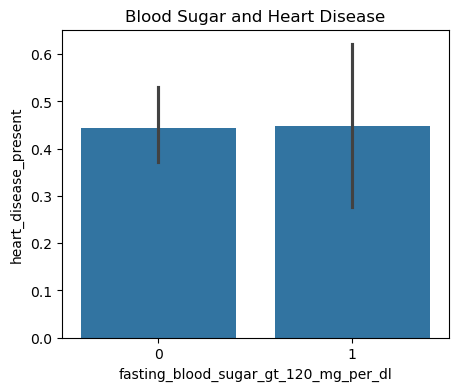

In [55]:
plt.figure(figsize=(5, 4))
sns.barplot(x=data['fasting_blood_sugar_gt_120_mg_per_dl'],y=data['heart_disease_present'])
plt.title("Blood Sugar and Heart Disease")
plt.show()

#### 1. Males are having higher blood sugar level compared to females.
#### 2. People with high blood sugar levels falls within the age between 48 and 77 years.
#### 3. People with high blood sugar level are more likely to develop heart disease.

### 7. Resting EKG Vs Heart Disease

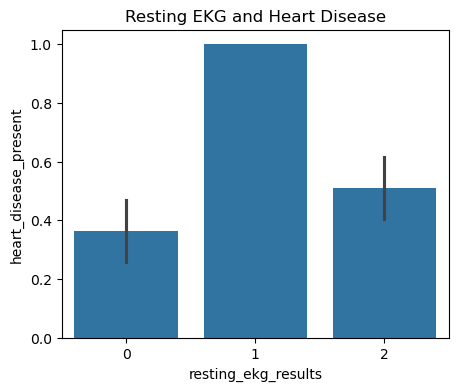

In [58]:
plt.figure(figsize=(5, 4))
sns.barplot(x=data['resting_ekg_results'],y=data['heart_disease_present'])
plt.title("Resting EKG and Heart Disease")
plt.show()

#### Resting EKG result = 0 shows, lower heart disease risk.
#### Resting EKG result = 1 shows, more number of patients are associated with heart disease.
#### Resting EKG result = 2 shows, around 50-60 percent of patients have thickened heart muscle, often due to hypertension (Moderate risk).

### 8.Cholesterol Vs Heart Disease

### 8(i) Cholesterol Vs Sex

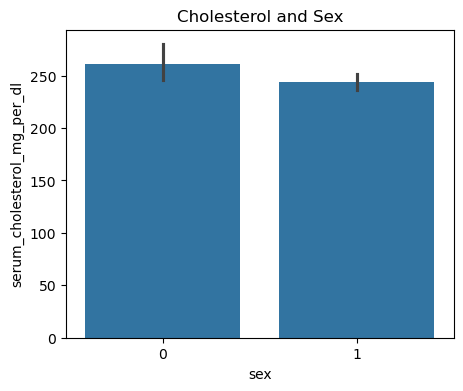

In [62]:
plt.figure(figsize=(5, 4))
sns.barplot(x=data['sex'],y=data['serum_cholesterol_mg_per_dl'])
plt.title("Cholesterol and Sex")
plt.show()

### 8(ii) Cholesterol Vs Age

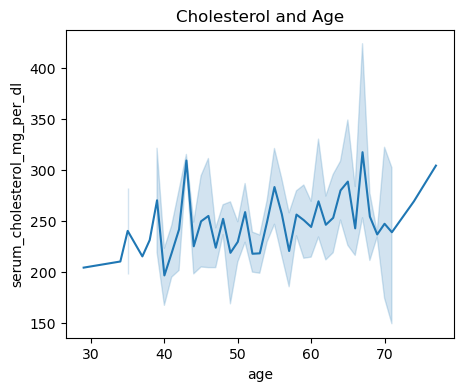

In [64]:
plt.figure(figsize=(5, 4))
sns.lineplot(x=data['age'],y=data['serum_cholesterol_mg_per_dl'])
plt.title("Cholesterol and Age")
plt.show()

### 8(iii) Cholesterol Vs HeartDisease

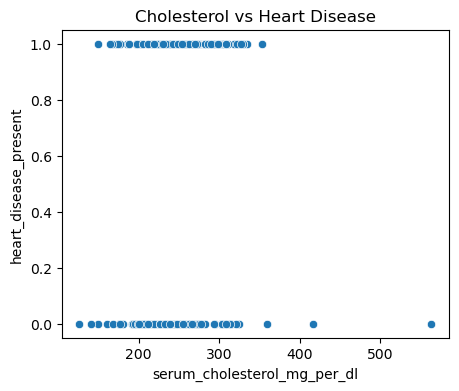

In [66]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x=data['serum_cholesterol_mg_per_dl'],y=data['heart_disease_present'])
plt.title("Cholesterol vs Heart Disease")
plt.show()

#### 1. Females are having higher serum cholesterol level compared to males.
#### 2. People with high serum cholesterol levels falls within the age between 35 and 80 years.
#### 3. People with high serum cholestrol level are more likely to develop heart disease.

### 9. Old Peak EQ ST depression Vs Heart Disease

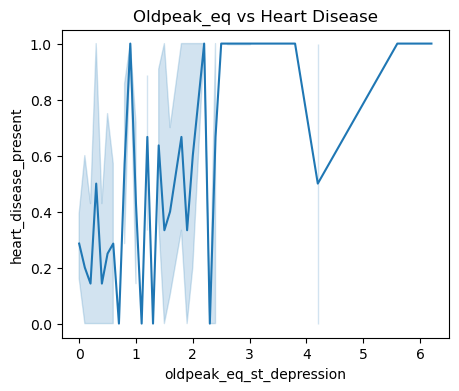

In [69]:
plt.figure(figsize=(5, 4))
sns.lineplot(x=data['oldpeak_eq_st_depression'],y=data['heart_disease_present'])
plt.title("Oldpeak_eq vs Heart Disease")
plt.show()

#### The patients with oldpeak values greater than 2.5 have a significantly higher risk of heart disease

### 10. Sex Vs Heart Disease

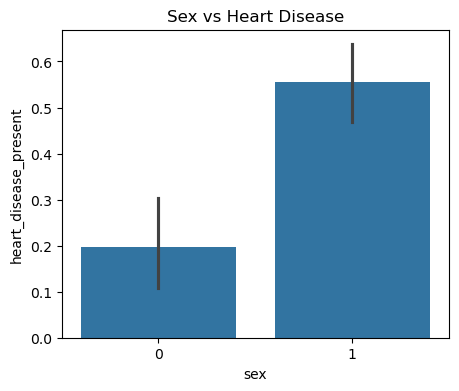

In [72]:
plt.figure(figsize=(5, 4))
sns.barplot(x=data['sex'],y=data['heart_disease_present'])
plt.title("Sex vs Heart Disease")
plt.show()

#### Males are more prone to heart disease than females.

### 11. Age Vs Heart Disease

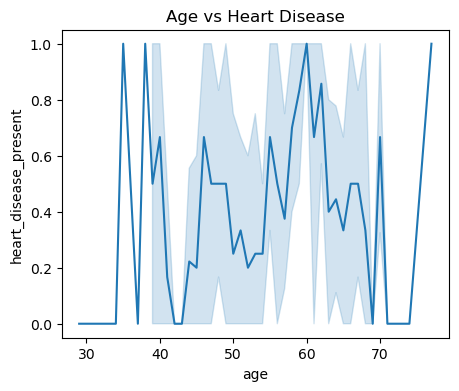

In [75]:
plt.figure(figsize=(5, 4))
sns.lineplot(x=data['age'],y=data['heart_disease_present'])
plt.title("Age vs Heart Disease")
plt.show()

#### People who are above the age of 35 are more prone to heart disease. The risk gets higher as they get older especially those who are above 50

## DATA PREPROCESSING

In [78]:
data.duplicated().sum() # There are no duplicates in the data

0

In [79]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

#### There are no null values in our data

## NUMERICAL COLUMNS

## Finding highly correlated data for numerical columns

In [83]:
def remove_highly_correlated_columns(data, threshold=0.9):
    data_numeric = data.select_dtypes(include=[np.number])
    corr_matrix = data_numeric.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    data.drop(columns=to_drop, inplace=True)
    return data

data = remove_highly_correlated_columns(data, threshold=0.9)
print(f"Updated DataFrame shape: {data.shape}")

Updated DataFrame shape: (180, 15)


#### We don't have highly correlated columns in our data

## HANDLING THE OUTLIERS

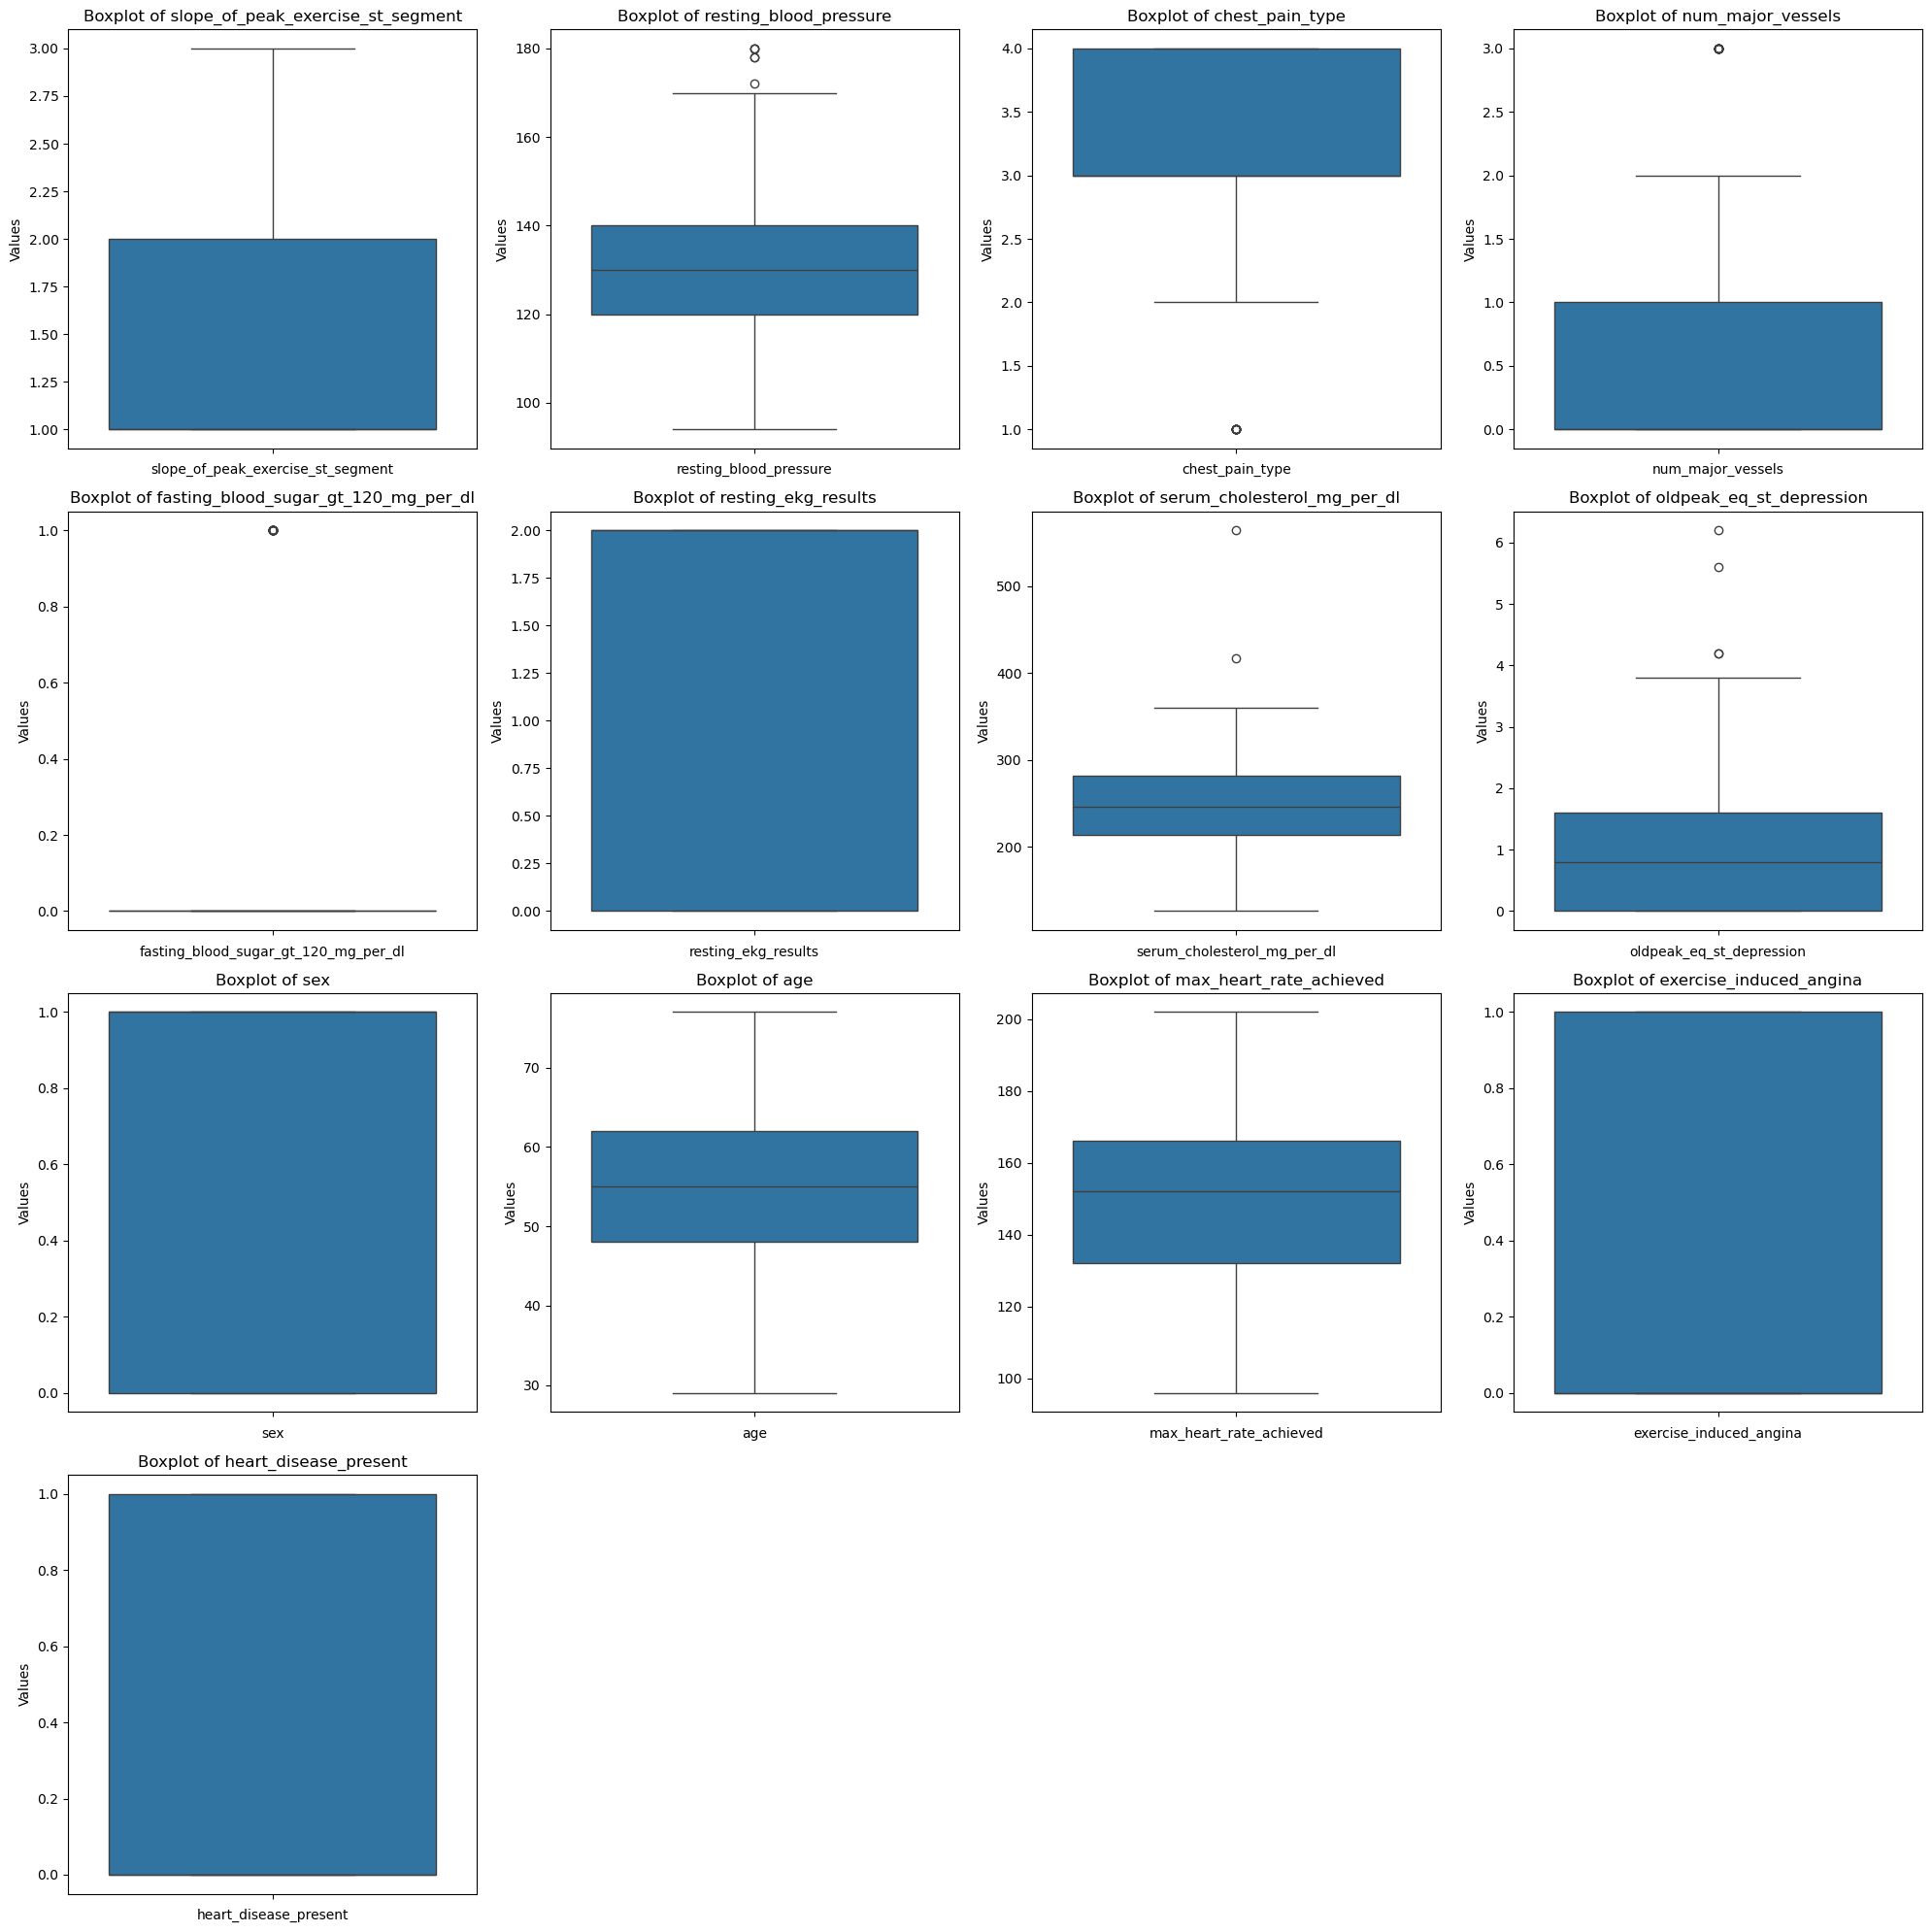

In [86]:
data_numeric = data.select_dtypes(include=[np.number])

num_cols = len(data_numeric.columns)

# Calculate the number of rows needed based on 4 columns per row
nrows = (num_cols // 4) + (num_cols % 4 > 0)

# Create subplots (4 columns in each row)
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, nrows * 5))

# Flatten the axes array to make it easier to loop through
axes = axes.flatten()

for i, column in enumerate(data_numeric.columns):
    
    sns.boxplot(data=data_numeric[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Values')

# Remove any unsed axes (incase there are fewer than 4 columns in the last row)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

## Removing the outliers by IQR method

In [88]:
def remove_outliers_iqr(df):
    df_clean = df.copy()
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[column] >= lower) & (df_clean[column] <= upper)]
    return df_clean

data_no_outliers = remove_outliers_iqr(data)

In [89]:
def plot_boxplots(df, title):
    numeric_cols = df.select_dtypes(include=[np.number])
    num_cols = len(numeric_cols.columns)
    nrows = (num_cols + 3) // 4
    fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, nrows * 5))
    axes = axes.flatten()
    for i, col in enumerate(numeric_cols.columns):
        sns.boxplot(y=numeric_cols[col], ax=axes[i])
        axes[i].set_title(f'{title}: {col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Value')
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

📊 Boxplots AFTER removing outliers:


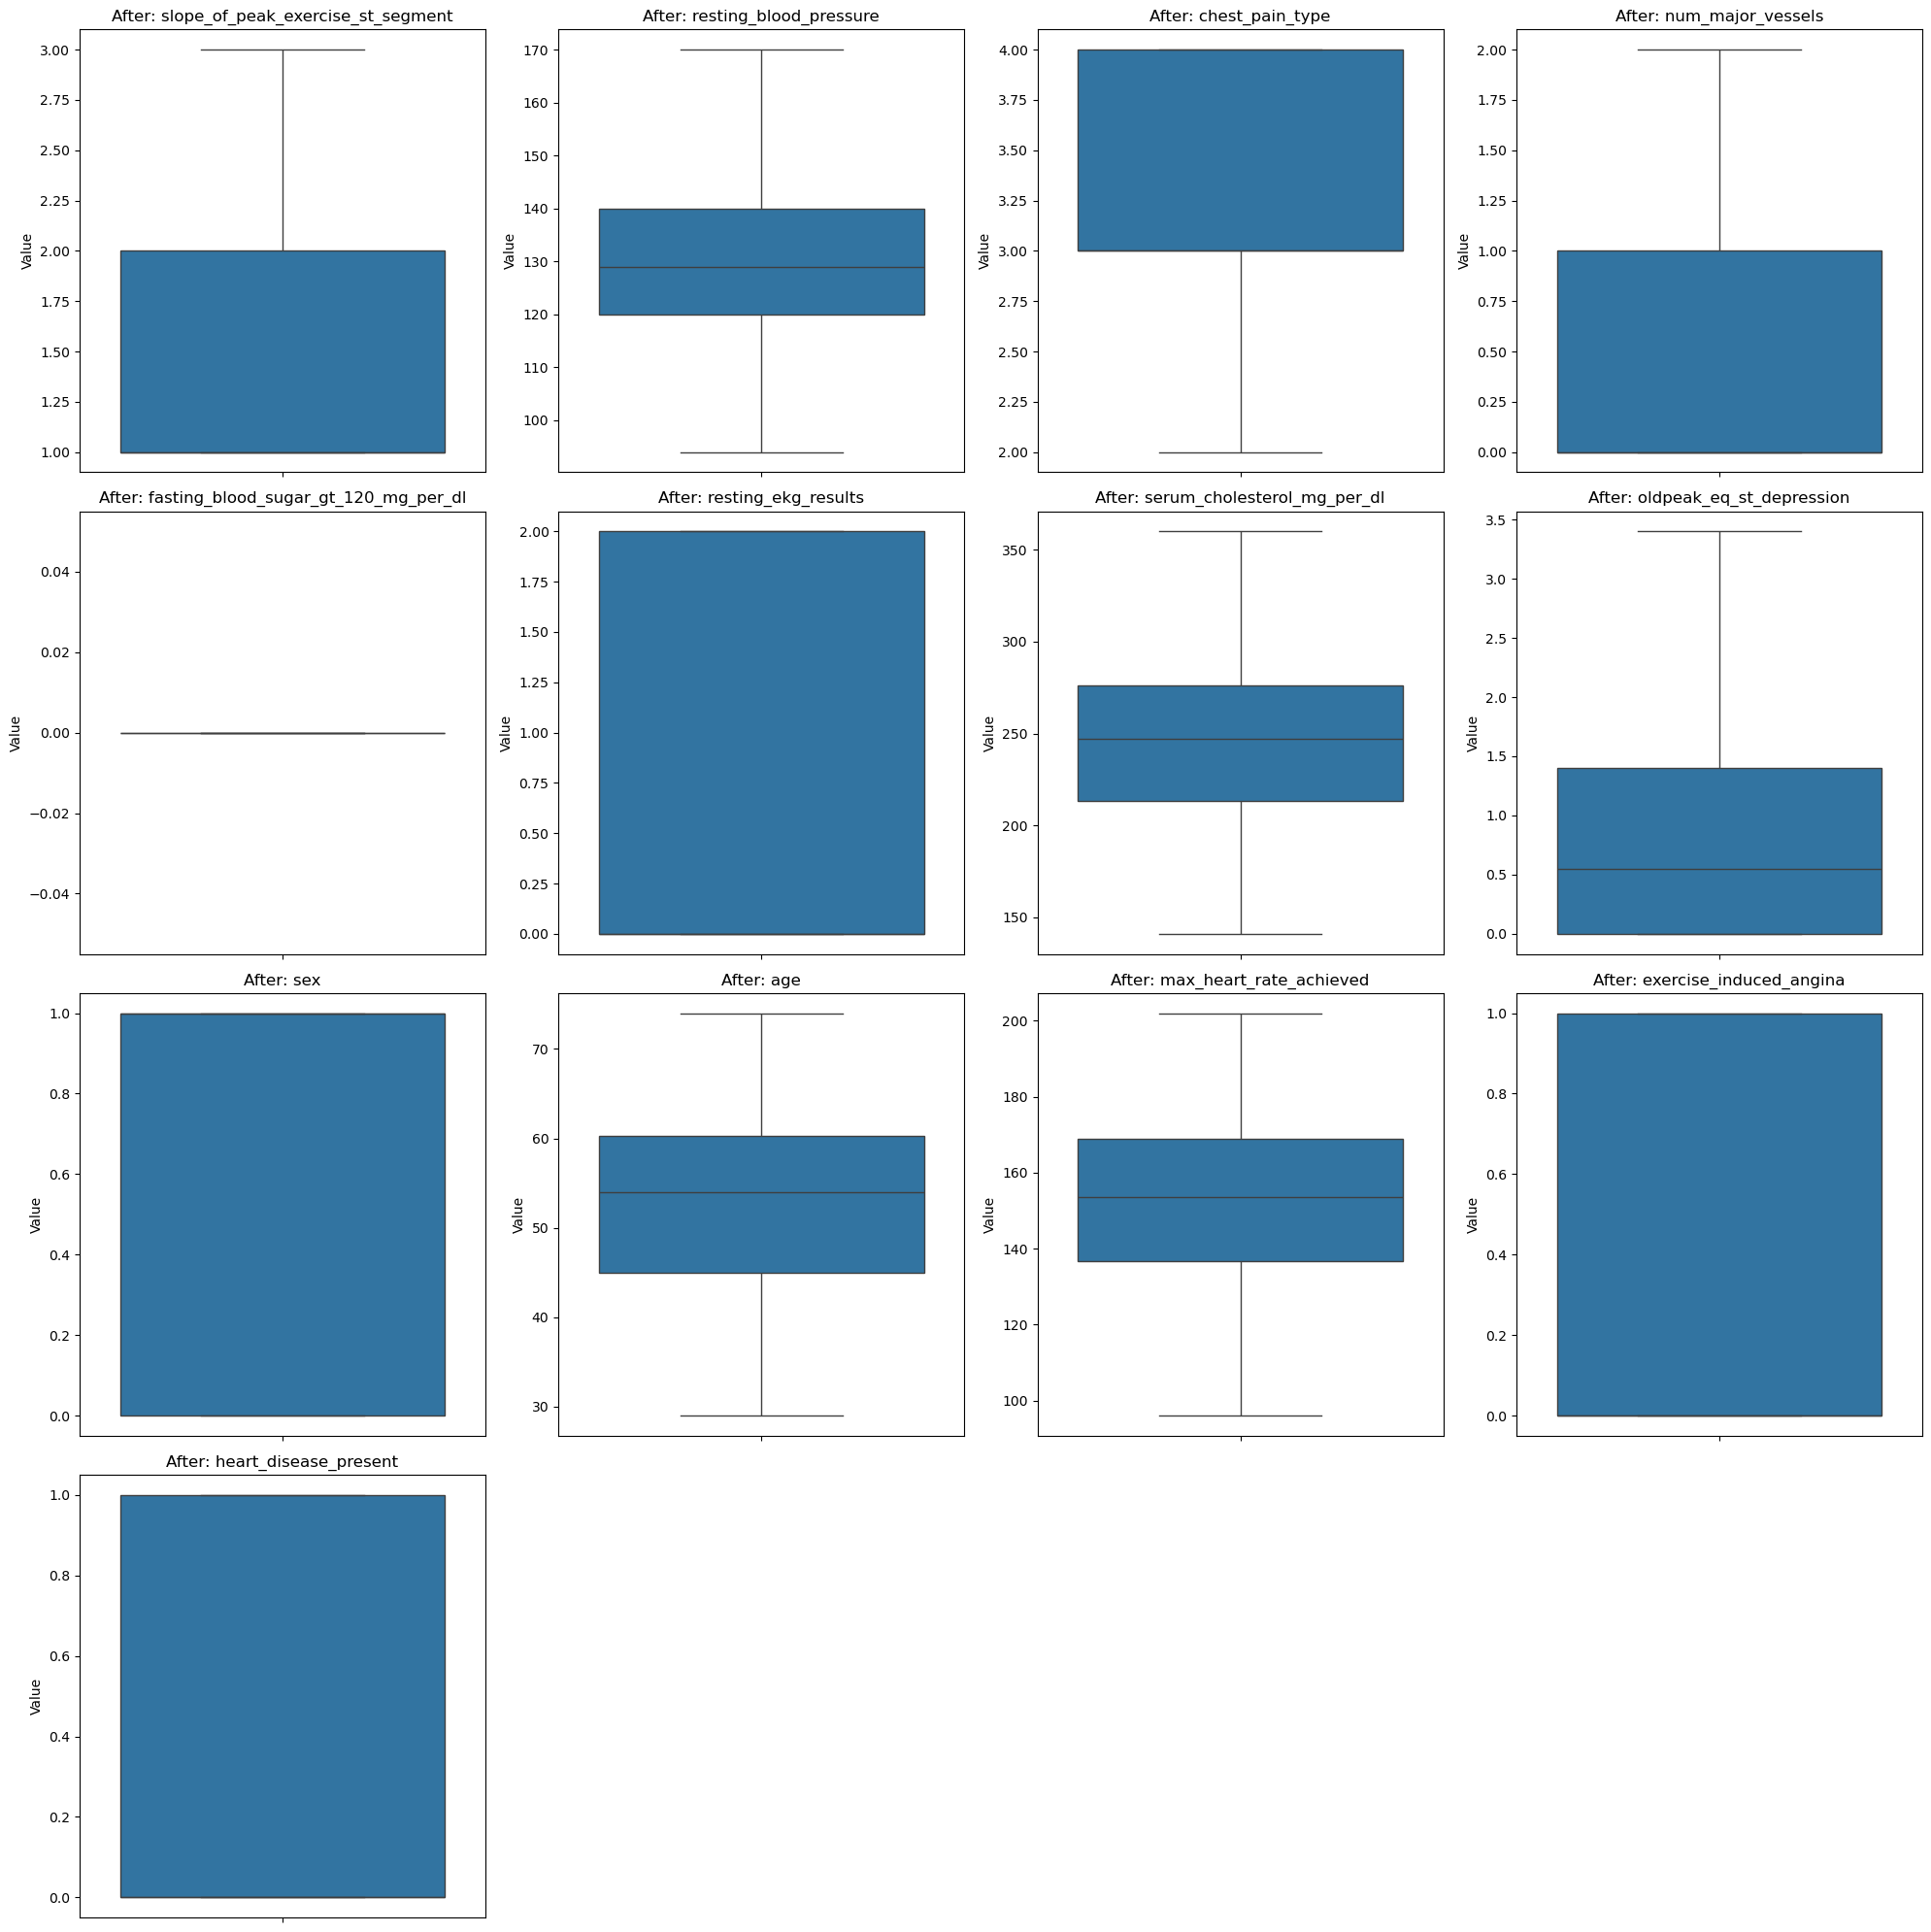

In [90]:
print("📊 Boxplots AFTER removing outliers:")
plot_boxplots(data_no_outliers, "After")

#### Outliers are removed for all the columns

## CATEGORICAL COLUMNS

In [93]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['patient_id', 'thal'], dtype='object')

#### We have only two columns with categorical values

## ENCODING FOR CATEGORICAL COLUMNS

In [96]:
categorical_cols

Index(['patient_id', 'thal'], dtype='object')

In [97]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data['patient_id']=le.fit_transform(data['patient_id'])
print(data.head(2))

   patient_id  slope_of_peak_exercise_st_segment    thal  \
0           6                                  1  normal   
1         147                                  2  normal   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     0                    0   

   serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                          308                       0.0    1   45   
1                          214                       1.6    0   54   

   max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
0                      170                        0                      0  
1                      158                        0              

In [98]:
print(data['patient_id'].dtype)

int32


In [99]:
le=LabelEncoder()
data['thal']=le.fit_transform(data['thal'])
print(data.head(2))

   patient_id  slope_of_peak_exercise_st_segment  thal  \
0           6                                  1     1   
1         147                                  2     1   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     0                    0   

   serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                          308                       0.0    1   45   
1                          214                       1.6    0   54   

   max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
0                      170                        0                      0  
1                      158                        0                    

In [100]:
print(data['thal'].dtype)

int32


### The categorical columns are encoded using Label Encoder.

# MODEL BULIDING

## 1.LOGISTIC REGRESSION MODEL

### Splitting and Scaling the data:

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('heart_disease_present', axis=1)
Y = data['heart_disease_present']

# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured:", sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.20369404 0.11063346 0.10090137 0.0831498  0.07626205]
Total Variance Captured: 0.5746407131898736


### Training the model:

In [108]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [109]:
# Predictions on the test data
Y_pred = model.predict(X_test)

### Evaluating the model

In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
logreg_score = print("Accuracy:", accuracy_score(Y_test, Y_pred))

# Calculate and print F1 score
logreg_f1_score = f1_score(Y_test, Y_pred)
print("F1 Score:", logreg_f1_score)

# Calculate and print Precision score
logreg_precision_score = precision_score(Y_test, Y_pred)
print("Precision Score:", logreg_precision_score)

# Calculate and print Recall score
logreg_recall_score = recall_score(Y_test, Y_pred)
print("Recall Score:", logreg_recall_score)

Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.83      0.75      0.79        20

    accuracy                           0.78        36
   macro avg       0.78      0.78      0.78        36
weighted avg       0.78      0.78      0.78        36

[[13  3]
 [ 5 15]]
Accuracy: 0.7777777777777778
F1 Score: 0.7894736842105263
Precision Score: 0.8333333333333334
Recall Score: 0.75


#### The Accuracy Score of Logistic Regression is 0.777
#### The F1 Score of Logistic Regression is 0.789
#### The Precision Score of Logistic Regression is 0.833
#### The Recall Score of Logistic Regression is 0.75

## 2. K-NEAREST NEIGHBORS (KNN) MODEL

### Scaling the data:

### Split the Training and Testing data:

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = data.drop('heart_disease_present', axis=1)
y = data['heart_disease_present']

# Split your data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Initializing and Training the model:

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5) 

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [119]:
# predictions on test data
y_pred = knn.predict(x_test)

### Evaluating the model

In [121]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

knn_score = print("Accuracy:", accuracy_score(y_test, y_pred))

# Calculate and print F1 score
knn_f1_score = f1_score(y_test, y_pred)
print("F1 Score:", knn_f1_score)

# Calculate and print Precision score
knn_precision_score = precision_score(y_test, y_pred)
print("Precision Score:", knn_precision_score)

# Calculate and print Recall score
knn_recall_score = recall_score(y_test, y_pred)
print("Recall Score:", knn_recall_score)


Accuracy: 0.5555555555555556

Confusion Matrix:
 [[13  3]
 [13  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.81      0.62        16
           1       0.70      0.35      0.47        20

    accuracy                           0.56        36
   macro avg       0.60      0.58      0.54        36
weighted avg       0.61      0.56      0.53        36

Accuracy: 0.5555555555555556
F1 Score: 0.4666666666666667
Precision Score: 0.7
Recall Score: 0.35


#### The Accuracy Score of KNN is 0.555
#### The F1 Score of KNN is 0.466
#### The Precision Score of KNN is 0.7
#### The Recall Score of KNN is 0.35

### Hyperparameter Tuning for KNN:

In [124]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Use stratified k-fold CV to preserve class balance (optional, but good practice)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Keep the grid light — just a few values
param_grid = {
    'n_neighbors': [3, 5, 7],  # instead of (1,21)
    'weights': ['uniform', 'distance'],  # small extra dimension
    'metric': ['euclidean']  # you could try 'manhattan' if curious
}

# Create the model
knn = KNeighborsClassifier()

# GridSearchCV with a single scoring metric
grid = GridSearchCV(knn, param_grid=param_grid, cv=cv, scoring='f1')  # or 'accuracy', 'recall', etc.

# Fit the model
grid.fit(X_train, y_train)

# Output results
print("Best hyperparameters:", grid.best_params_)
print("Best cross-validated F1 score:", grid.best_score_)

# Final model
best_knn = grid.best_estimator_


Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validated F1 score: 0.5008302574618363


In [125]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Predict on test data
y_pred = best_knn.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5277777777777778
F1 Score: 0.37037037037037035
Precision: 0.7142857142857143
Recall: 0.25

Confusion Matrix:
 [[14  2]
 [15  5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.88      0.62        16
           1       0.71      0.25      0.37        20

    accuracy                           0.53        36
   macro avg       0.60      0.56      0.50        36
weighted avg       0.61      0.53      0.48        36



### The Accuracy Score of SVM is 0.52
### The F1 Score of SVM is 0.37
### The Precision Score of SVM is 0.71
### The Recall Score of SVM is 0.25

### The accuracy score, F1 score, Precision value and recall score is reducing after hyperparameter tuning.

## 3. SUPPORT VECTOR MACHINE (SVM) MODEL

### Splitting and Scaling the data:

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

A = data.drop('heart_disease_present', axis=1)
B = data['heart_disease_present']

# Split your data
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
A_train_scaled = scaler.fit_transform(A_train)
A_test_scaled = scaler.transform(A_test)

### Initializing and Training the model

In [131]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

svm_model.fit(A_train, B_train)

SVC(random_state=42)

In [132]:
# Predictions on test data
B_pred = svm_model.predict(A_test)

### Evaluating the model

In [134]:
print("Accuracy:", accuracy_score(B_test, B_pred))
print("\nConfusion Matrix:\n", confusion_matrix(B_test, B_pred))
print("\nClassification Report:\n", classification_report(B_test, B_pred))

svm_score = print("Accuracy:", accuracy_score(B_test, B_pred))

# Calculate and print F1 score
svm_f1_score = f1_score(B_test, B_pred)
print("F1 Score:", svm_f1_score)

# Calculate and print Precision score
svm_precision_score = precision_score(B_test, B_pred)
print("Precision Score:", svm_precision_score)

# Calculate and print Recall score
svm_recall_score = recall_score(B_test, B_pred)
print("Recall Score:", svm_recall_score)

Accuracy: 0.4444444444444444

Confusion Matrix:
 [[16  0]
 [20  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.44      1.00      0.62        16
           1       0.00      0.00      0.00        20

    accuracy                           0.44        36
   macro avg       0.22      0.50      0.31        36
weighted avg       0.20      0.44      0.27        36

Accuracy: 0.4444444444444444
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0


#### The Accuracy Score of SVM is 0.444
#### The F1 Score of SVM is 0.0
#### The Precision Score of SVM is 0.0
#### The Recall Score of SVM is 0.0

### Hyperparameter tuning

In [137]:
# Use Stratified K-Fold for better reliability on small datasets
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Light hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],                # Regularization parameter
    'kernel': ['linear', 'rbf'],      # Linear and Gaussian
    'gamma': ['scale', 'auto']        # For RBF kernel
}

# Create the SVM model
svm = SVC()

# Grid search
grid = GridSearchCV(svm, param_grid, cv=cv, scoring='f1')  # Change scoring if needed
grid.fit(A_train, B_train)

# Best model info
print("Best hyperparameters:", grid.best_params_)
print("Best cross-validated F1 score:", grid.best_score_)

# Final model
best_svm = grid.best_estimator_

# Predict and evaluate on test set
B_pred = best_svm.predict(A_test)
print("\nTest set performance:")
print(classification_report(B_test, B_pred))

Best hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validated F1 score: 0.780034255599473

Test set performance:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



In [138]:

# Use the best model found during GridSearchCV
best_svm = grid.best_estimator_

# Predict on the test data
B_pred = best_svm.predict(A_test)

# Evaluate performance
print("Test Accuracy:", accuracy_score(B_test, B_pred))
print("F1 Score:", f1_score(B_test, B_pred))
print("Precision:", precision_score(B_test, B_pred))
print("Recall:", recall_score(B_test, B_pred))

# Confusion matrix and full report
print("\nConfusion Matrix:\n", confusion_matrix(B_test, B_pred))
print("\nClassification Report:\n", classification_report(B_test, B_pred))


Test Accuracy: 0.8611111111111112
F1 Score: 0.8571428571428571
Precision: 1.0
Recall: 0.75

Confusion Matrix:
 [[16  0]
 [ 5 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



### The Accuracy Score of SVM is 0.86
### The F1 Score of SVM is 0.85
### The Precision Score of SVM is 1.0
### The Recall Score of SVM is 0.75

### After hyperparameter tuning the accuracy, precision score, recall score and F1 score is improved.

## 4. NAIVE BAYES MODEL

### Splitting and Scaling the data:

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

a = data.drop('heart_disease_present', axis=1)
b = data['heart_disease_present']

# Split your data
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
a_train_scaled = scaler.fit_transform(a_train)
a_test_scaled = scaler.transform(a_test)

### Initializing and Training the model

In [144]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(a_train, b_train)

GaussianNB()

In [145]:
# Predictions on the test data
b_pred = nb_model.predict(a_test)

### Evaluate the Model

In [147]:
print("Naive Bayes Accuracy:", accuracy_score(b_test, b_pred))
print("\nConfusion Matrix:\n", confusion_matrix(b_test, b_pred))
print("\nClassification Report:\n", classification_report(b_test, b_pred))

naive_bayes_score = print("Naive Bayes Accuracy:", accuracy_score(b_test, b_pred))

# Calculate and print F1 score
naive_f1_score = f1_score(b_test, b_pred)
print("F1 Score:", naive_f1_score)

# Calculate and print Precision score
naive_precision_score = precision_score(b_test, b_pred)
print("Precision Score:", naive_precision_score)

# Calculate and print Recall score
naive_recall_score = recall_score(b_test, b_pred)
print("Recall Score:", naive_recall_score)

Naive Bayes Accuracy: 0.8055555555555556

Confusion Matrix:
 [[16  0]
 [ 7 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82        16
           1       1.00      0.65      0.79        20

    accuracy                           0.81        36
   macro avg       0.85      0.82      0.80        36
weighted avg       0.86      0.81      0.80        36

Naive Bayes Accuracy: 0.8055555555555556
F1 Score: 0.7878787878787878
Precision Score: 1.0
Recall Score: 0.65


#### The Accuracy Score of Naive Bayes is 0.8055
#### The F1 Score of Naive Bayes is 0.7878
#### The Precision Score of Naive Bayes is 1.0
#### The Recall Score of Naive Bayes is 0.65

## 5. RANDOM FOREST MODEL

### Splitting and Scaling the data:

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C = data.drop('heart_disease_present', axis=1)
D = data['heart_disease_present']

# Split your data
C_train, C_test, D_train, D_test = train_test_split(C, D, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
C_train_scaled = scaler.fit_transform(C_train)
C_test_scaled = scaler.transform(C_test)


### Initializing and Training the Model

In [153]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(C_train, D_train)

RandomForestClassifier(random_state=42)

In [154]:
# Predictions on the test data
D_pred = rf_model.predict(C_test)

### Evaluating the Model

In [156]:
print("Random Forest Accuracy:", accuracy_score(D_test, D_pred))
print("\nConfusion Matrix:\n", confusion_matrix(D_test, D_pred))
print("\nClassification Report:\n", classification_report(D_test, D_pred))

random_forest_score = print("Random Forest Accuracy:", accuracy_score(D_test, D_pred))

# Calculate and print F1 score
rf_f1_score = f1_score(D_test, D_pred)
print("F1 Score:", rf_f1_score)

# Calculate and print Precision score
rf_precision_score = precision_score(D_test, D_pred)
print("Precision Score:", rf_precision_score)

# Calculate and print Recall score
rf_recall_score = recall_score(D_test, D_pred)
print("Recall Score:", rf_recall_score)

Random Forest Accuracy: 0.8611111111111112

Confusion Matrix:
 [[16  0]
 [ 5 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36

Random Forest Accuracy: 0.8611111111111112
F1 Score: 0.8571428571428571
Precision Score: 1.0
Recall Score: 0.75


#### The Accuracy Score of Random Forest is 0.8611
#### The F1 Score of Random Forest is 0.8571
#### The Precision Score of Random Forest is 1.0
#### The Recall Score of Random Forest is 0.75

## 6.DECISION TREE MODEL

### Splitting and Scaling the data:

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

c = data.drop('heart_disease_present', axis=1)
d = data['heart_disease_present']

# Split your data
c_train, c_test, d_train, d_test = train_test_split(c, d, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
c_train_scaled = scaler.fit_transform(c_train)
c_test_scaled = scaler.transform(c_test)


### Initializing and Training the Model

In [162]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(c_train, d_train)

DecisionTreeClassifier(random_state=42)

In [163]:
# Predictions on test data
d_pred = dt_model.predict(c_test)

### Evaluating the Model

In [165]:
print("Decision Tree Accuracy:", accuracy_score(d_test, d_pred))
print("\nConfusion Matrix:\n", confusion_matrix(d_test, d_pred))
print("\nClassification Report:\n", classification_report(d_test, d_pred))

decision_tree_score = print("Decision Tree Accuracy:", accuracy_score(d_test, d_pred))

# Calculate and print F1 score
decision_f1_score = f1_score(d_test, d_pred)
print("F1 Score:", decision_f1_score)

# Calculate and print Precision score
decision_precision_score = precision_score(d_test, d_pred)
print("Precision Score:", decision_precision_score)

# Calculate and print Recall score
decision_recall_score = recall_score(d_test, d_pred)
print("Recall Score:", decision_recall_score)

Decision Tree Accuracy: 0.75

Confusion Matrix:
 [[15  1]
 [ 8 12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.94      0.77        16
           1       0.92      0.60      0.73        20

    accuracy                           0.75        36
   macro avg       0.79      0.77      0.75        36
weighted avg       0.80      0.75      0.75        36

Decision Tree Accuracy: 0.75
F1 Score: 0.7272727272727273
Precision Score: 0.9230769230769231
Recall Score: 0.6


#### The Accuracy Score of Decision Tree is 0.75
#### The F1 Score of Decision Tree is 0.7272
#### The Precision Score of Decision Tree is 0.923
#### The Recall Score of Decision Tree is 0.6

## 7. GRADIENT BOOSTING (XGBOOST) MODEL

### Splitting and Scaling the data:

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

E = data.drop('heart_disease_present', axis=1)
F = data['heart_disease_present']

# Split your data
E_train, E_test, F_train, F_test = train_test_split(E, F, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
E_train_scaled = scaler.fit_transform(E_train)
E_test_scaled = scaler.transform(E_test)


### Initializing and Training the Model

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb_model.fit(E_train, F_train)

GradientBoostingClassifier(random_state=42)

In [172]:
# Predictions on the test data
F_pred = gb_model.predict(E_test)

### Evaluate the Model

In [174]:
print("Gradient Boosting Accuracy:", accuracy_score(F_test, F_pred))
print("\nConfusion Matrix:\n", confusion_matrix(F_test, F_pred))
print("\nClassification Report:\n", classification_report(F_test, F_pred))

gradient_boosting_score = print("Gradient Boosting Accuracy:", accuracy_score(F_test, F_pred))

# Calculate and print F1 score
gb_f1_score = f1_score(F_test, F_pred)
print("F1 Score:", gb_f1_score)

# Calculate and print Precision score
gb_precision_score = precision_score(F_test, F_pred)
print("Precision Score:", gb_precision_score)

# Calculate and print Recall score
gb_recall_score = recall_score(F_test, F_pred)
print("Recall Score:", gb_recall_score)

Gradient Boosting Accuracy: 0.75

Confusion Matrix:
 [[13  3]
 [ 6 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.82      0.70      0.76        20

    accuracy                           0.75        36
   macro avg       0.75      0.76      0.75        36
weighted avg       0.76      0.75      0.75        36

Gradient Boosting Accuracy: 0.75
F1 Score: 0.7567567567567568
Precision Score: 0.8235294117647058
Recall Score: 0.7


#### The Accuracy Score of Gradient Boosting is 0.75
#### The F1 Score of Gradient Boosting is 0.756
#### The Precision Score of Gradient Boosting is 0.823
#### The Recall Score of Gradient Boosting is 0.7

## COMPARISION OF ACCURACY SCORE

In [177]:
from sklearn.metrics import accuracy_score

logreg_score = accuracy_score(Y_test, Y_pred)
knn_score = accuracy_score(y_test, y_pred)
svm_score = accuracy_score(B_test, B_pred)
naive_bayes_score = accuracy_score(b_test, b_pred)
random_forest_score = accuracy_score(D_test, D_pred)
decision_tree_score = accuracy_score(d_test, d_pred)
gradient_boosting_score = accuracy_score(F_test, F_pred)

In [178]:
results = {
    "LOGISTIC REGRESSION": logreg_score,
    "KNN": knn_score,
    "SVM": svm_score,
    "NAIVE BAYES": naive_bayes_score,
    "RANDOM FOREST": random_forest_score,
    "DECISION TREE": decision_tree_score,
    "GRADIENT BOOSTING": gradient_boosting_score
}

In [179]:
print("Model Accuracy Comparison:")
for model, score in results.items():
    print(f"{model} Accuracy: {score:.4f}")

Model Accuracy Comparison:
LOGISTIC REGRESSION Accuracy: 0.7778
KNN Accuracy: 0.5278
SVM Accuracy: 0.8611
NAIVE BAYES Accuracy: 0.8056
RANDOM FOREST Accuracy: 0.8611
DECISION TREE Accuracy: 0.7500
GRADIENT BOOSTING Accuracy: 0.7500


## COMPARISION OF F1 SCORE

In [181]:
from sklearn.metrics import f1_score

logreg_f1_score = f1_score(Y_test, Y_pred)
knn_f1_score = f1_score(y_test, y_pred)
svm_f1_score = f1_score(B_test, B_pred)
naive_f1_score = f1_score(b_test, b_pred)
rf_f1_score = f1_score(D_test, D_pred)
decision_f1_score = f1_score(d_test, d_pred)
gb_f1_score = f1_score(F_test, F_pred)

In [182]:
results = {
    "LOGISTIC REGRESSION": logreg_f1_score,
    "KNN": knn_f1_score,
    "SVM": svm_f1_score,
    "NAIVE BAYES": naive_f1_score,
    "RANDOM FOREST": rf_f1_score,
    "DECISION TREE": decision_f1_score,
    "GRADIENT BOOSTING": gb_f1_score
}

In [183]:
print("Model F1 Score Comparison:")
for model, score in results.items():
    print(f"{model} F1 Score: {score:.4f}")

Model F1 Score Comparison:
LOGISTIC REGRESSION F1 Score: 0.7895
KNN F1 Score: 0.3704
SVM F1 Score: 0.8571
NAIVE BAYES F1 Score: 0.7879
RANDOM FOREST F1 Score: 0.8571
DECISION TREE F1 Score: 0.7273
GRADIENT BOOSTING F1 Score: 0.7568


## COMPARISION OF PRECISION SCORE

In [185]:
logreg_precision_score = precision_score(Y_test, Y_pred)
knn_precision_score = precision_score(y_test, y_pred)
svm_precision_score = precision_score(B_test, B_pred)
naive_precision_score = precision_score(b_test, b_pred)
rf_precision_score = precision_score(D_test, D_pred)
decision_precision_score = precision_score(d_test, d_pred)
gb_precision_score = precision_score(F_test, F_pred)

In [186]:
results = {
    "LOGISTIC REGRESSION": logreg_precision_score,
    "KNN": knn_precision_score,
    "SVM": svm_precision_score,
    "NAIVE BAYES": naive_precision_score,
    "RANDOM FOREST": rf_precision_score,
    "DECISION TREE": decision_precision_score,
    "GRADIENT BOOSTING": gb_precision_score
}

In [187]:
print("Model Precision Score Comparison:")
for model, score in results.items():
    print(f"{model} Precision Score: {score:.4f}")

Model Precision Score Comparison:
LOGISTIC REGRESSION Precision Score: 0.8333
KNN Precision Score: 0.7143
SVM Precision Score: 1.0000
NAIVE BAYES Precision Score: 1.0000
RANDOM FOREST Precision Score: 1.0000
DECISION TREE Precision Score: 0.9231
GRADIENT BOOSTING Precision Score: 0.8235


## COMPARSION OF RECALL SCORE

In [189]:
logreg_recall_score = recall_score(Y_test, Y_pred)
knn_recall_score = recall_score(y_test, y_pred)
svm_recall_score = recall_score(B_test, B_pred)
naive_recall_score = recall_score(b_test, b_pred)
rf_recall_score = recall_score(D_test, D_pred)
decision_recall_score = recall_score(d_test, d_pred)
gb_recall_score = recall_score(F_test, F_pred)

In [190]:
results = {
    "LOGISTIC REGRESSION": logreg_recall_score,
    "KNN": knn_recall_score,
    "SVM": svm_recall_score,
    "NAIVE BAYES": naive_recall_score,
    "RANDOM FOREST": rf_recall_score,
    "DECISION TREE": decision_recall_score,
    "GRADIENT BOOSTING": gb_recall_score
}

In [191]:
print("Model Recall Score Comparison:")
for model, score in results.items():
    print(f"{model} Recall Score: {score:.4f}")

Model Recall Score Comparison:
LOGISTIC REGRESSION Recall Score: 0.7500
KNN Recall Score: 0.2500
SVM Recall Score: 0.7500
NAIVE BAYES Recall Score: 0.6500
RANDOM FOREST Recall Score: 0.7500
DECISION TREE Recall Score: 0.6000
GRADIENT BOOSTING Recall Score: 0.7000


# The model that works really good with more accuracy:

In [193]:
results = {
    'Random Forest': {'Accuracy': 0.86, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.85},
    'Logistic Regression': {'Accuracy': 0.83, 'Precision': 0.94, 'Recall': 0.75, 'F1 Score': 0.83},
    'KNN': {'Accuracy': 0.55, 'Precision': 0.7, 'Recall': 0.35, 'F1 Score': 0.46},
    'SVM': {'Accuracy': 0.86, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.85},
    'Naive Bayes': {'Accuracy': 0.80, 'Precision': 1.0, 'Recall': 0.65, 'F1 Score': 0.78},
    'Decision Tree': {'Accuracy': 0.75, 'Precision': 0.92, 'Recall': 0.6, 'F1 Score': 0.72},
    'Gradient Boosting': {'Accuracy': 0.75, 'Precision': 0.82, 'Recall': 0.7, 'F1 Score': 0.75}
}

# Choose metric
metric_to_compare = 'Accuracy'

# Find the highest score for the selected metric
highest_score = max(model[metric_to_compare] for model in results.values())

# Find all models with that highest score
best_models = {model: metrics for model, metrics in results.items() if metrics[metric_to_compare] == highest_score}

# Print all top models
print(f"Models with the highest {metric_to_compare} ({highest_score:.2f}):\n")
for model, metrics in best_models.items():
    print(f"{model}: {metrics}")


Models with the highest Accuracy (0.86):

Random Forest: {'Accuracy': 0.86, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.85}
SVM: {'Accuracy': 0.86, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.85}


### The best model for prediction of Heart Disease Prediction dataset based on accuracy is Random Forest and SVM with an accuracy score of 0.8611

## The model that works best based on Precision Score

In [196]:
results = {
    'Random Forest': {'Accuracy': 0.86, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.85},
    'Logistic Regression': {'Accuracy': 0.83, 'Precision': 0.94, 'Recall': 0.75, 'F1 Score': 0.83},
    'KNN': {'Accuracy': 0.55, 'Precision': 0.7, 'Recall': 0.35, 'F1 Score': 0.46},
    'SVM': {'Accuracy': 0.86, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.85},
    'Naive Bayes': {'Accuracy': 0.80, 'Precision': 1.0, 'Recall': 0.65, 'F1 Score': 0.78},
    'Decision Tree': {'Accuracy': 0.75, 'Precision': 0.92, 'Recall': 0.6, 'F1 Score': 0.72},
    'Gradient Boosting': {'Accuracy': 0.75, 'Precision': 0.82, 'Recall': 0.7, 'F1 Score': 0.75}
}

# Choose metric
metric_to_compare = 'Precision'

# Find the highest score for the selected metric
highest_score = max(model[metric_to_compare] for model in results.values())

# Find all models with that highest score
best_models = {model: metrics for model, metrics in results.items() if metrics[metric_to_compare] == highest_score}

# Print all top models
print(f"Models with the highest {metric_to_compare} ({highest_score:.2f}):\n")
for model, metrics in best_models.items():
    print(f"{model}: {metrics}")


Models with the highest Precision (1.00):

Random Forest: {'Accuracy': 0.86, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.85}
SVM: {'Accuracy': 0.86, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.85}
Naive Bayes: {'Accuracy': 0.8, 'Precision': 1.0, 'Recall': 0.65, 'F1 Score': 0.78}


### The best model for prediction of Heart Disease Prediction dataset based on Precision is Random Forest, SVM and Naive Bayes with a precision score of 1.0.

## The model that works well based on F1 Score

In [198]:
results = {
    'Random Forest': {'Accuracy': 0.86, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.85},
    'Logistic Regression': {'Accuracy': 0.83, 'Precision': 0.94, 'Recall': 0.75, 'F1 Score': 0.83},
    'KNN': {'Accuracy': 0.55, 'Precision': 0.7, 'Recall': 0.35, 'F1 Score': 0.46},
    'SVM': {'Accuracy': 0.86, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.85},
    'Naive Bayes': {'Accuracy': 0.80, 'Precision': 1.0, 'Recall': 0.65, 'F1 Score': 0.78},
    'Decision Tree': {'Accuracy': 0.75, 'Precision': 0.92, 'Recall': 0.6, 'F1 Score': 0.72},
    'Gradient Boosting': {'Accuracy': 0.75, 'Precision': 0.82, 'Recall': 0.7, 'F1 Score': 0.75}
}

# Choose metric
metric_to_compare = 'F1 Score'

# Find the highest score for the selected metric
highest_score = max(model[metric_to_compare] for model in results.values())

# Find all models with that highest score
best_models = {model: metrics for model, metrics in results.items() if metrics[metric_to_compare] == highest_score}

# Print all top models
print(f"Models with the highest {metric_to_compare} ({highest_score:.2f}):\n")
for model, metrics in best_models.items():
    print(f"{model}: {metrics}")


Models with the highest F1 Score (0.85):

Random Forest: {'Accuracy': 0.86, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.85}
SVM: {'Accuracy': 0.86, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.85}


### The best model for prediction of Heart Disease Prediction dataset based on F1 score is Random Forest and SVM with an F1 score of 0.85.

## The model that works well based on Recall Score

In [200]:
results = {
    'Random Forest': {'Accuracy': 0.86, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.85},
    'Logistic Regression': {'Accuracy': 0.83, 'Precision': 0.94, 'Recall': 0.75, 'F1 Score': 0.83},
    'KNN': {'Accuracy': 0.55, 'Precision': 0.7, 'Recall': 0.35, 'F1 Score': 0.46},
    'SVM': {'Accuracy': 0.86, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.85},
    'Naive Bayes': {'Accuracy': 0.80, 'Precision': 1.0, 'Recall': 0.65, 'F1 Score': 0.78},
    'Decision Tree': {'Accuracy': 0.75, 'Precision': 0.92, 'Recall': 0.6, 'F1 Score': 0.72},
    'Gradient Boosting': {'Accuracy': 0.75, 'Precision': 0.82, 'Recall': 0.7, 'F1 Score': 0.75}
}

# Choose metric
metric_to_compare = 'Recall'

# Find the highest score for the selected metric
highest_score = max(model[metric_to_compare] for model in results.values())

# Find all models with that highest score
best_models = {model: metrics for model, metrics in results.items() if metrics[metric_to_compare] == highest_score}

# Print all top models
print(f"Models with the highest {metric_to_compare} ({highest_score:.2f}):\n")
for model, metrics in best_models.items():
    print(f"{model}: {metrics}")


Models with the highest Recall (0.75):

Random Forest: {'Accuracy': 0.86, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.85}
Logistic Regression: {'Accuracy': 0.83, 'Precision': 0.94, 'Recall': 0.75, 'F1 Score': 0.83}
SVM: {'Accuracy': 0.86, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.85}


### The best model for prediction of Heart Disease Prediction dataset based on Recall score is Random Forest, Logistic Regression and SVM with a recall score of 0.75.

## The model that works best for our heart disease prediction is Random Forest and SVM.

# Suggestions for the Hospital Based on Heart Disease Predictions

## 1. Early Screening & Risk Assessment Programs:

#### * Use the model to flag high-risk patients during routine checkups.

#### * Encourage patients with risk factors (like high BP, cholesterol, diabetes) to undergo screening more often.

#### * Incorporate the prediction tool into electronic health record (EHR) systems to automatically assess risk.



## 2. Personalized Preventive Plans:

#### * Design customized lifestyle recommendations (diet, exercise, medication) for high-risk patients based on model predictions.

#### * Assign health coaches or dietitians to help guide at-risk individuals.

## 3. Targeted Awareness Campaigns:

#### * Run health awareness drives specifically targeting people predicted to be at moderate/high risk.

#### * Use SMS or email alerts for educational tips, reminders for check-ups.



# PROJECT REPORT:

### Data analysis on the given data is completed
### We have used 7 models that is Logistic Regression, SVM, KNN, Naive Bayes, Random Forest, Decision Tree, Gradient Boosting to predict the heart disease and the accuracy score for almost all the 7 models except KNN is above 75 percent.
### Among the seven, the accuracy score is highest for Random Forest and SVM.

# PROJECT RISKS:

### There is an imbalance in the data. The data of males is more than the data of females.
### The presence of several medical terms in the dataset made it challenging at times to understand the data and complete the project effectively.

# CONCLUSION:

### This is a prediction based problem. Heart disease can be predicted using machine learning models by analyzing patient data such as age, blood pressure, blood sugar, cholesterol levels.
### In this project we have done Basic checks, Exploratory Data Analysis, Univariate and Bivariate Analysis, Data Preprocessing, Scaling, Model building for Logistic Regression, SVM, KNN, Naive Bayes, Random Forest, Decision Tree, Gradient Boosting.
### Among the seven models used in this dataset, Random Forest and SVM turns out to be the best with an accuracy score of 86 percent, showing the potential of ML in supporting early diagnosis.
### This project shows how technology can help identify high-risk patients early, which can lead to better treatment, prevention, and reduced life-threatening cases.